<a href="https://colab.research.google.com/github/bagalnilesh/Data-Science-Projects/blob/master/Langchain%26LanggraphwithGroq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install langchain langgraph langsmith langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Succ

In [ ]:
groq_api_key= "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"

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_api_key,model_name = "Gemma2-9b-it")
print(llm)

client=<groq.resources.chat.completions.Completions object at 0x7a9348f08650> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a9348f092d0> model_name='Gemma2-9b-it' model_kwargs={} groq_api_key=SecretStr('**********')


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]
graph_builder = StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot_new(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node('chatbot_new',chatbot_new)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

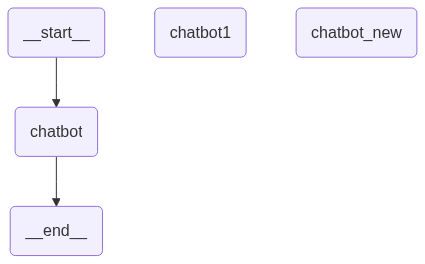

In [ ]:
graph_builder.compile()

In [ ]:
graph = graph_builder.compile()

In [ ]:
while True:
    user_input=input("user:")
    if user_input.lower() in ['quit','q']:
        print('Good Bye, thank you using LangGrpah Framework')
        break
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:',value['messages'].content)

dict_values([{'messages': AIMessage(content="I can't predict the future! \n\nThe ICC World Test Championship (WTC) final in 2025 is far too far away to know who will win. \n\nLots can change in the world of cricket between now and then, including:\n\n* **Team form:** Teams' performance fluctuates.  \n* **Player injuries and retirements:**  Key players can be unavailable.\n* **Emerging talent:** New stars can rise.\n\nIt's exciting to think about the possibilities, but we'll have to wait and see who emerges victorious! 🏏🏆\n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 19, 'total_tokens': 144, 'completion_time': 0.227272727, 'prompt_time': 0.001957507, 'queue_time': 0.108325868, 'total_time': 0.229230234}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--455c3fcd-7238-4907-b2d3-cc2831a3a1d0-0', usage_metadata={'input_tokens': 19, 'output_tokens': 125, 'total